##### Imports

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

##### Data Loading

In [3]:
df = pd.read_csv('Salary_Data[1].csv')

In [4]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


In [6]:
df.sample()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
83,52.0,Male,PhD,Chief Technology Officer,24.0,250000.0


##### Data Inspection

In [7]:
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=375, step=1)

In [9]:
df.shape

(375, 6)

In [10]:
df.size

2250

In [11]:
df.ndim

2

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [13]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


<Axes: >

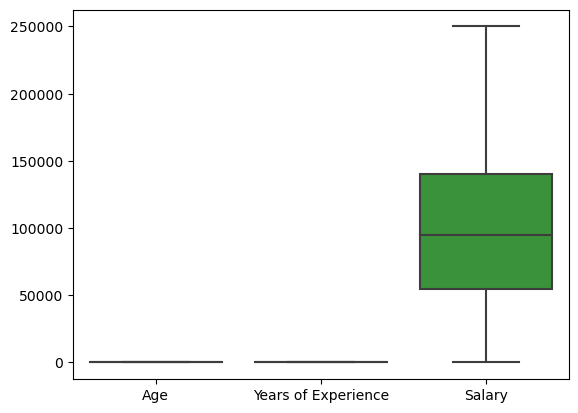

In [14]:
sns.boxplot(df)

In [15]:
df['Salary'].max()

250000.0

In [16]:
df['Salary'].min()

350.0

<Axes: >

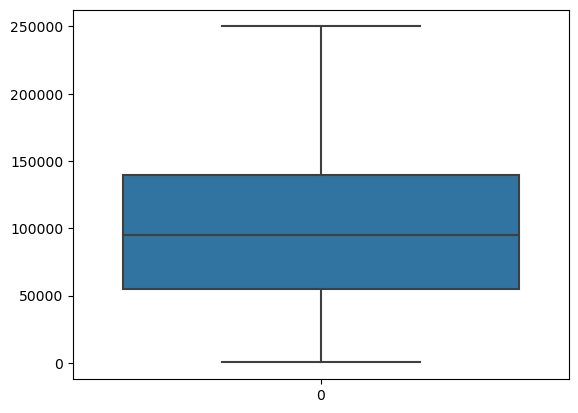

In [17]:
sns.boxplot(df['Salary'])

In [18]:
df['Salary'].describe()

count       373.000000
mean     100577.345845
std       48240.013482
min         350.000000
25%       55000.000000
50%       95000.000000
75%      140000.000000
max      250000.000000
Name: Salary, dtype: float64

In [19]:
 df.skew()

Age                    0.197522
Years of Experience    0.361220
Salary                 0.400578
dtype: float64

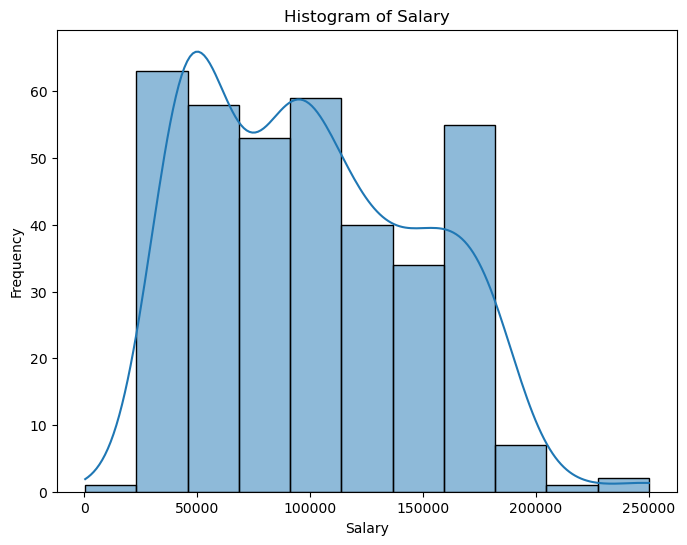

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], kde=True)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

<Axes: >

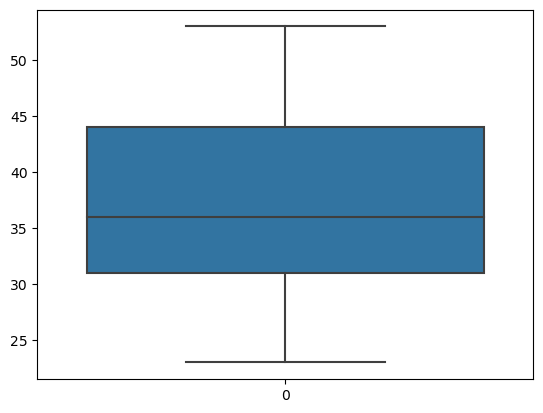

In [21]:
sns.boxplot(df['Age'])

<Axes: >

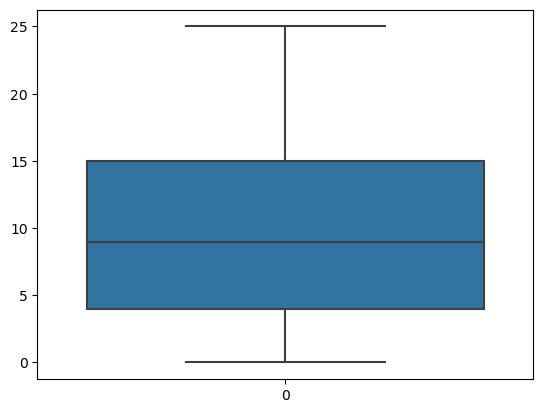

In [22]:
sns.boxplot(df['Years of Experience'])

In [23]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})

In [24]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1.0,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,0.0,Master's,Data Analyst,3.0,65000.0
2,45.0,1.0,PhD,Senior Manager,15.0,150000.0
3,36.0,0.0,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,1.0,Master's,Director,20.0,200000.0


In [25]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [26]:
df.dropna(inplace=True)

In [27]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [28]:
df['Age'] = df['Age'].astype(int)

In [29]:
df['Gender'] = df['Gender'].astype(int)

In [30]:
df['Years of Experience'] = df['Years of Experience'].astype(int)

In [31]:
df['Salary'] = df['Salary'].astype(int)

In [32]:
df.sample()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
328,38,0,Bachelor's,Senior Business Analyst,10,110000


In [33]:
df['Education Level'].value_counts()

Bachelor's    224
Master's       98
PhD            51
Name: Education Level, dtype: int64

In [34]:
df['Education Level'] = df['Education Level'].replace({'Bachelor\'s': 0, 'Master\'s': 1,'PhD':2})

In [35]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,0,Software Engineer,5,90000
1,28,0,1,Data Analyst,3,65000
2,45,1,2,Senior Manager,15,150000
3,36,0,0,Sales Associate,7,60000
4,52,1,1,Director,20,200000


In [36]:
df['Job Title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: Job Title, Length: 174, dtype: int64

In [38]:
df1 = df[['Age','Gender','Education Level','Years of Experience','Salary']]

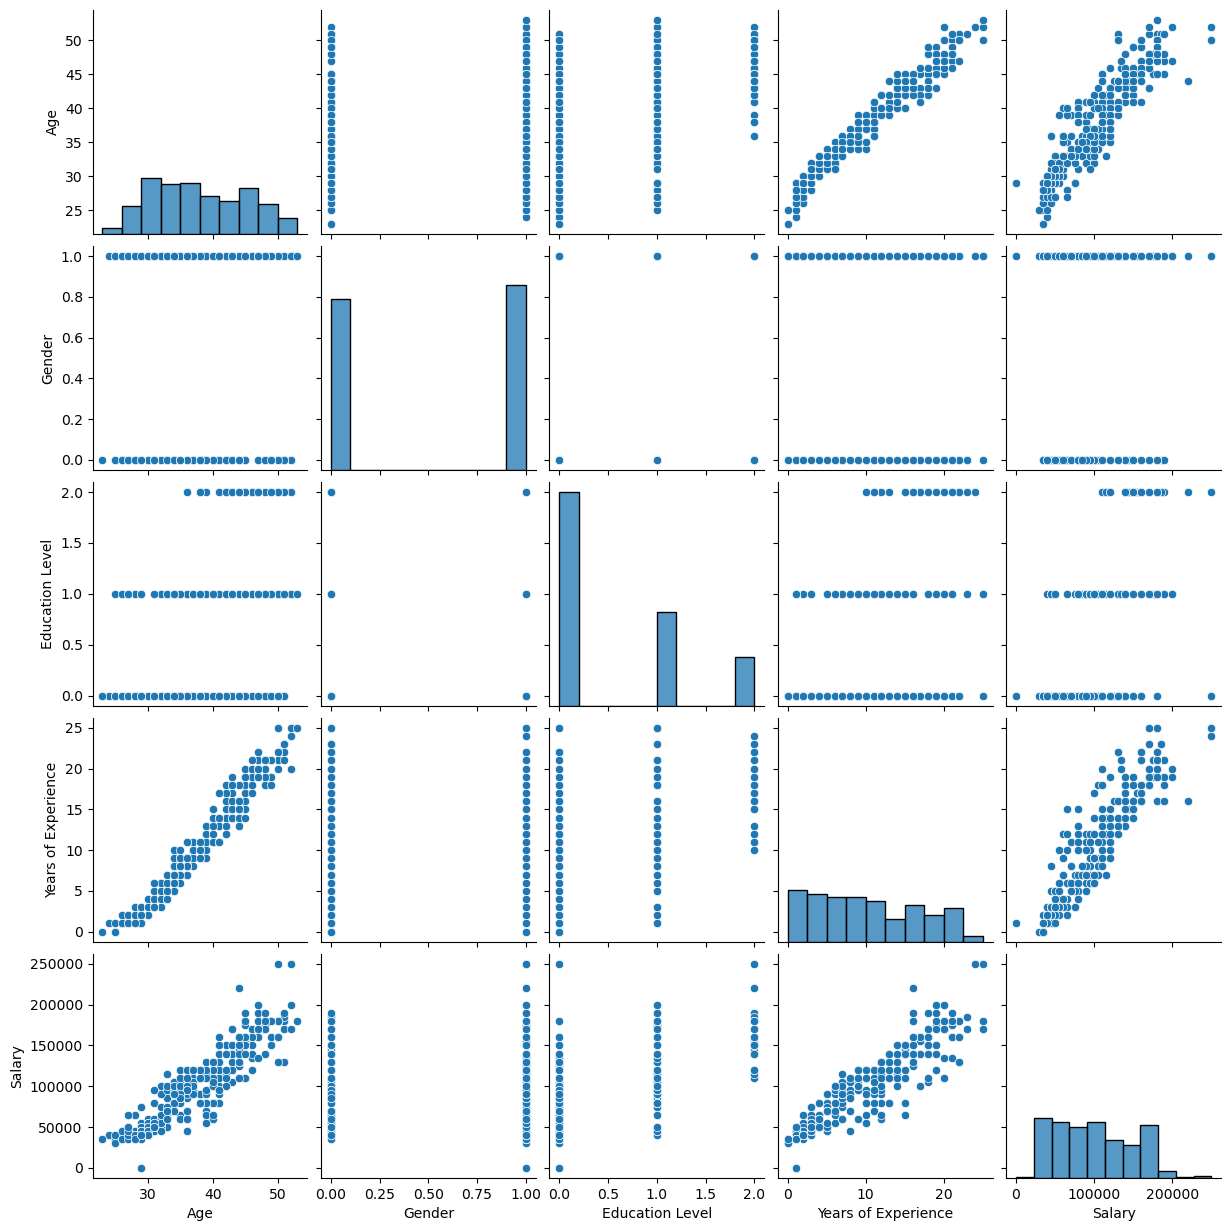

In [54]:
sns.pairplot(df1)
plt.show()

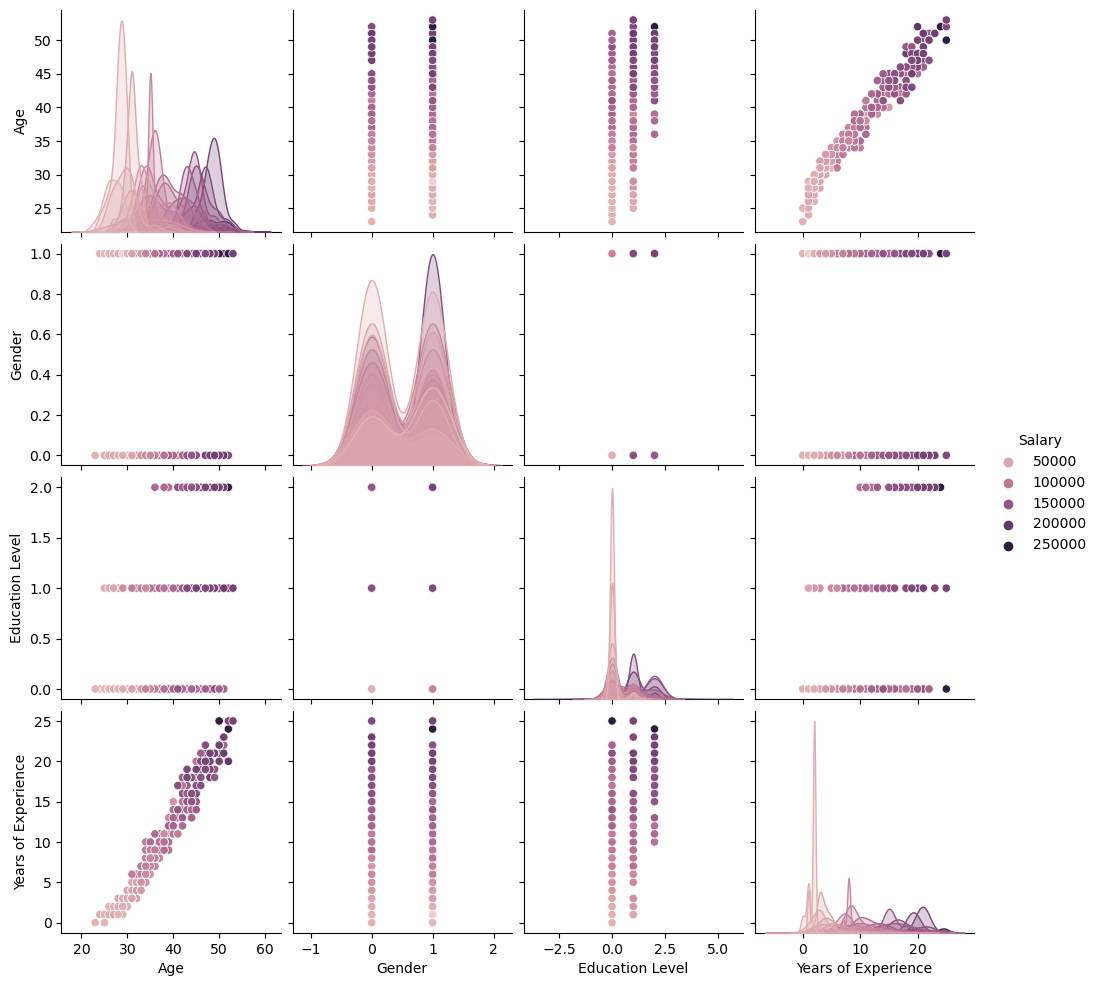

In [55]:
sns.pairplot(df1,hue='Salary')
plt.show()

In [56]:
# Years of experience - Salary
# Age - Salary

# MultiCollinearity

# Years of expereince - Age

##### ReScaling

In [60]:
scaler = MinMaxScaler()
num_vars = ['Age','Gender','Education Level','Years of Experience','Salary']
df1[num_vars] = scaler.fit_transform(df1[num_vars])

In [61]:
df1.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,0.300000,1.0,0.0,0.20,0.359103
1,0.166667,0.0,0.5,0.12,0.258963
2,0.733333,1.0,1.0,0.60,0.599439
3,0.433333,0.0,0.0,0.28,0.238935
4,0.966667,1.0,0.5,0.80,0.799720


##### Splitting Data

In [62]:
X = df1.drop('Salary', axis=1)  
y = df1['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [63]:
X_train.shape

(261, 4)

In [64]:
X_test.shape

(112, 4)

In [66]:
y_train.shape

(261,)

In [67]:
y_test.shape

(112,)

In [68]:
X_train.describe()

,Age,Gender,Education Level,Years of Experience
count,261.000000,261.000000,261.000000,261.000000
mean,0.475734,0.524904,0.272031,0.394330
std,0.230289,0.500339,0.370477,0.255545
min,0.000000,0.000000,0.000000,0.000000
25%,0.266667,0.000000,0.000000,0.160000
50%,0.433333,1.000000,0.000000,0.360000
75%,0.666667,1.000000,0.500000,0.600000
max,0.966667,1.000000,1.000000,1.000000


In [70]:
X_test.describe()

,Age,Gender,Education Level,Years of Experience
count,112.000000,112.000000,112.000000,112.000000
mean,0.493452,0.508929,0.258929,0.415000
std,0.248271,0.502167,0.342106,0.280957
min,0.033333,0.000000,0.000000,0.000000
25%,0.291667,0.000000,0.000000,0.160000
50%,0.433333,1.000000,0.000000,0.360000
75%,0.700000,1.000000,0.500000,0.640000
max,1.000000,1.000000,1.000000,1.000000


##### StatsModel

In [71]:
X_train_sm = sm.add_constant(X_train['Age'])
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params

const    0.037303
Age      0.758528
dtype: float64

In [73]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1359.
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          5.05e-105
Time:                        19:36:29   Log-Likelihood:                 301.85
No. Observations:                 261   AIC:                            -599.7
Df Residuals:                     259   BIC:                            -592.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0373      0.011      3.431      0.001       0.016       0.059
Age            0.7585      0.021     36.860      0.000       0.718       0.799
==============================================================================
Omnibus:                       14.183   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               36.571
Skew:                           0.038   Prob(JB):                     1.15e-08
Kurtosis:                       4.832   Cond. No.                         5.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
X_train_sm =X_train[['Age','Years of Experience']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     773.1
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          1.09e-109
Time:                        19:38:14   Log-Likelihood:                 316.60
No. Observations:                 261   AIC:                            -627.2
Df Residuals:                     258   BIC:                            -616.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0961      0.015      6.510      0.000       0.067       0.125
Age                     0.2369      0.096      2.471      0.014       0.048       0.426
Years of Experience     0.4801      0.086      5.556      0.000       0.310       0.650
==============================================================================
Omnibus:                       28.971   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.788
Skew:                          -0.415   Prob(JB):                     3.18e-20
Kurtosis:                       5.751   Cond. No.                         34.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
X_train_sm =X_train[['Age','Years of Experience','Education Level']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     662.6
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          1.35e-120
Time:                        19:40:50   Log-Likelihood:                 345.61
No. Observations:                 261   AIC:                            -683.2
Df Residuals:                     257   BIC:                            -669.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0970      0.013      7.327      0.000       0.071       0.123
Age                     0.2800      0.086      3.251      0.001       0.110       0.450
Years of Experience     0.3522      0.079      4.453      0.000       0.196       0.508
Education Level         0.1069      0.013      8.000      0.000       0.081       0.133
==============================================================================
Omnibus:                       25.685   Durbin-Watson:                   1.927
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.782
Skew:                           0.259   Prob(JB):                     4.32e-21
Kurtosis:                       5.891   Cond. No.                         35.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
X_train_sm =X_train[['Age','Years of Experience','Education Level','Gender']]
X_train_sm=sm.add_constant(X_train_sm)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     547.9
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          3.65e-124
Time:                        19:41:55   Log-Likelihood:                 357.40
No. Observations:                 261   AIC:                            -704.8
Df Residuals:                     256   BIC:                            -687.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0709      0.014      5.159      0.000       0.044       0.098
Age                     0.3295      0.083      3.965      0.000       0.166       0.493
Years of Experience     0.3076      0.076      4.031      0.000       0.157       0.458
Education Level         0.1073      0.013      8.388      0.000       0.082       0.133
Gender                  0.0382      0.008      4.919      0.000       0.023       0.053
==============================================================================
Omnibus:                       23.885   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.498
Skew:                           0.300   Prob(JB):                     1.10e-16
Kurtosis:                       5.529   Cond. No.                         39.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### VIF

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
0,Age,46.00
3,Years of Experience,45.77
2,Education Level,2.33
1,Gender,1.82


######  VIF
1. High High :
 High pvalue,High VIF - definitely DROP 

2. High Low : 
High pvalue, low vif  ---> Remove these FIRST then create new model then
low pvalue , high vif ---> remove after the ones above

3. Low Low :
low pvalue , low vif 

In [121]:
X = X_train.drop('Age',axis=1)

In [122]:
X_train_sm = sm.add_constant(X)
lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     685.9
Date:                Sat, 10 Jun 2023   Prob (F-statistic):          2.62e-122
Time:                        20:20:34   Log-Likelihood:                 349.62
No. Observations:                 261   AIC:                            -691.2
Df Residuals:                     257   BIC:                            -677.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1148      0.008     13.668      0.000       0.098       0.131
Gender                  0.0344      0.008      4.349      0.000       0.019       0.050
Education Level         0.1041      0.013      7.931      0.000       0.078       0.130
Years of Experience     0.6010      0.019     31.574      0.000       0.564       0.638
==============================================================================
Omnibus:                       17.441   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.695
Skew:                           0.026   Prob(JB):                     2.19e-12
Kurtosis:                       5.221   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
2,Years of Experience,2.99
1,Education Level,2.30
0,Gender,1.60


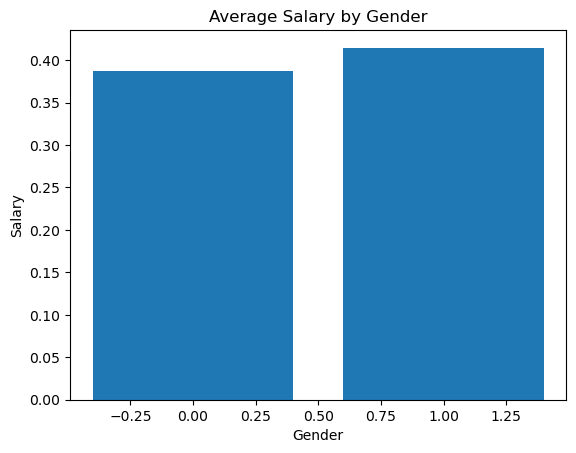

In [98]:
gender_salary = df1.groupby('Gender')['Salary'].mean()
plt.bar(gender_salary.index, gender_salary)
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.title('Average Salary by Gender')
plt.show()

##### Top Factors deciding the salary are :

1. Years of Experience
2. Education Level
3. Gender

##### Residual Analysis

In [99]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

26     0.431273
174    0.190870
35     0.197280
262    0.686057
39     0.654046
         ...   
345    0.245361
361    0.317482
325    0.365562
282    0.658031
8      0.138804
Length: 261, dtype: float64

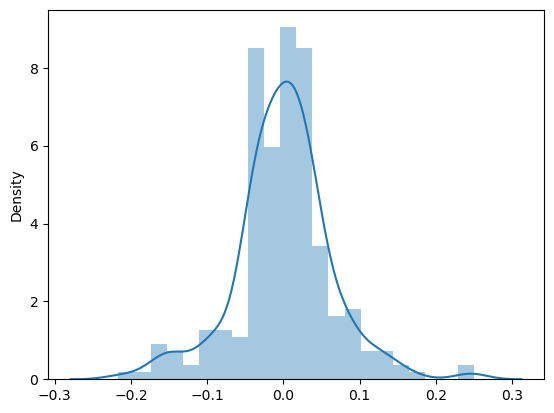

In [100]:
res = y_train-y_train_pred
sns.distplot(res)
plt.show()

In [104]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()
X_test_sm = X_test_sm.drop(['Age'],axis = 1)

In [105]:
y_test_pred = lr_model.predict(X_test_sm)

In [106]:
y_test_pred

161    0.706112
179    0.682071
132    0.455313
98     0.407233
209    0.162844
         ...   
218    0.173240
118    0.186885
136    0.658031
347    0.658031
19     0.678086
Length: 112, dtype: float64

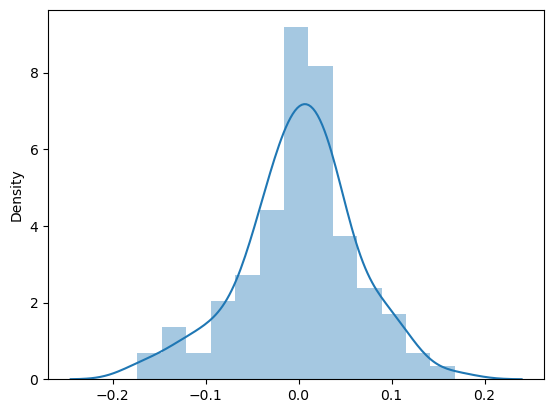

In [107]:
res = y_test-y_test_pred
sns.distplot(res)
plt.show()

##### R2 

In [139]:
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(comparison)

       Actual  Predicted
161  0.699579   0.706112
179  0.679551   0.682071
132  0.399159   0.455313
98   0.359103   0.407233
209  0.158822   0.162844
..        ...        ...
218  0.138794   0.173240
118  0.178850   0.186885
136  0.559383   0.658031
347  0.719607   0.658031
19   0.719607   0.678086

[112 rows x 2 columns]


In [137]:
r2_score_value = r2_score(y_true=y_test, y_pred=y_test_pred)
print("R-squared score:", r2_score_value*100)

R-squared score: 90.55651482456898
